In [21]:
import sklearn
import pandas
import matplotlib.pyplot as plt
import seaborn


In [22]:
dataUrl = "Cardiovascular_Disease_Dataset.csv"

dataset = pandas.read_csv(dataUrl , sep=",")

dataset_backup = dataset.copy()

In [23]:
dataset = dataset_backup.copy()

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


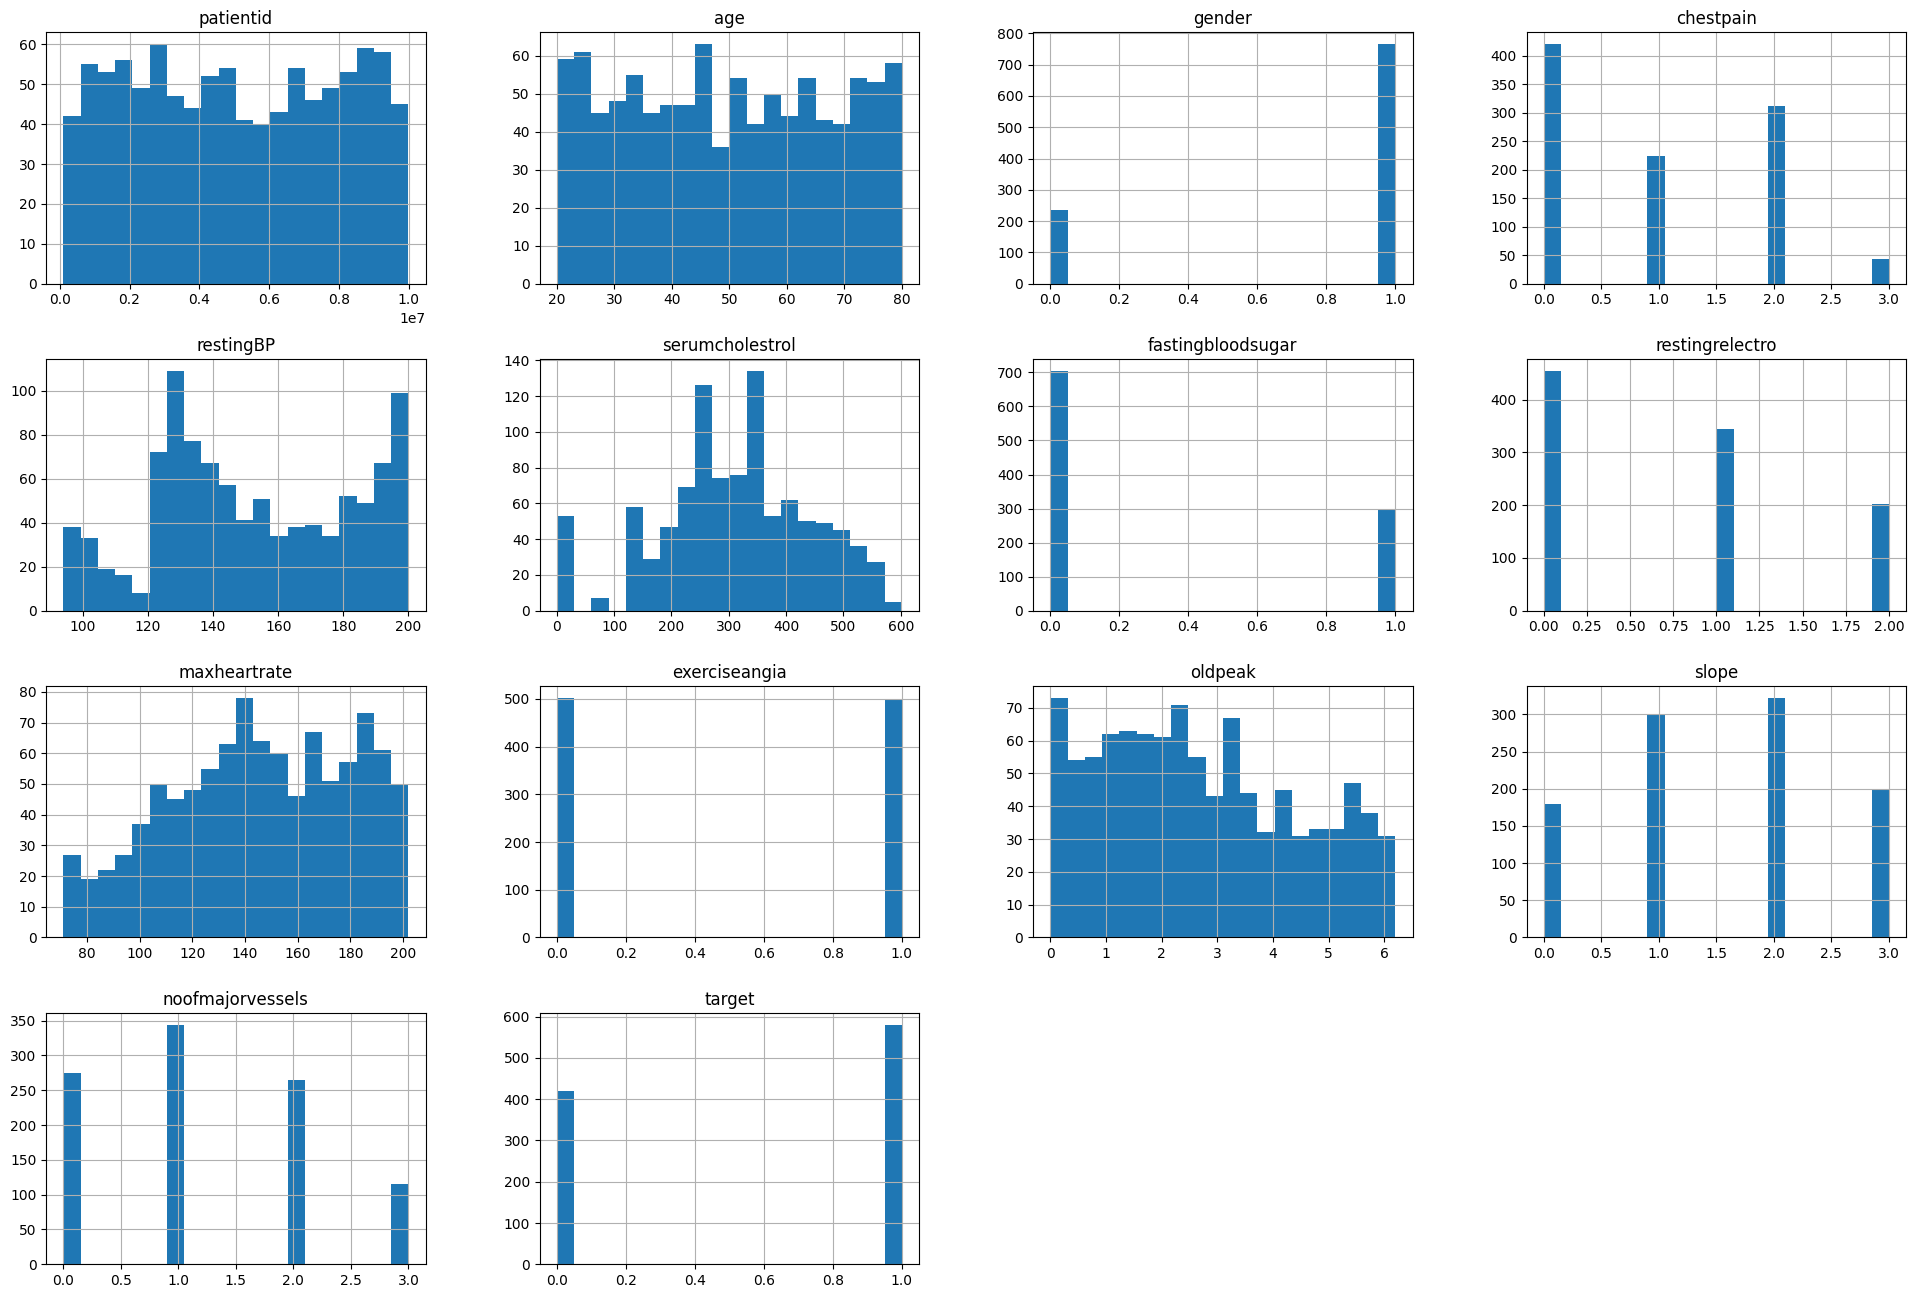

In [25]:
dataset.hist(bins=20 , figsize=(24 , 16))
plt.show()

In [26]:
corrMatrix = dataset.corr(numeric_only=True)
corrMatrix['target'].reindex(dataset.columns.tolist())

patientid           -0.005637
age                  0.008356
gender               0.015769
chestpain            0.554228
restingBP            0.482387
serumcholestrol      0.195340
fastingbloodsugar    0.303233
restingrelectro      0.426837
maxheartrate         0.228343
exerciseangia       -0.039874
oldpeak              0.098053
slope                0.797358
noofmajorvessels     0.489866
target               1.000000
Name: target, dtype: float64

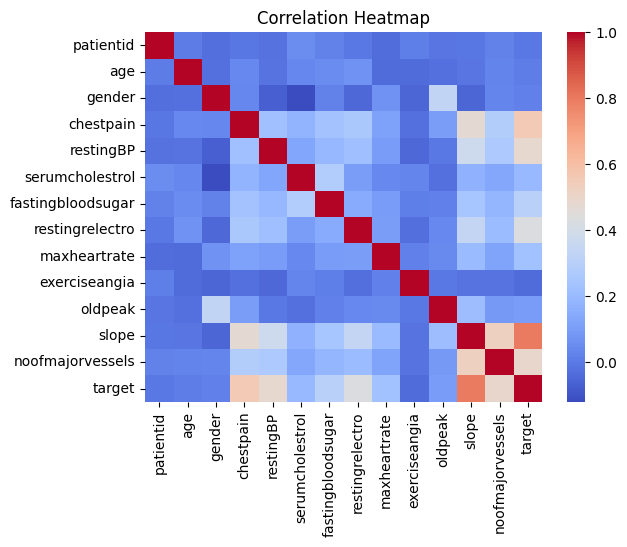

In [27]:
hm = seaborn.heatmap(corrMatrix , annot=False , cmap='coolwarm')
hm.set_title('Correlation Heatmap')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

x = dataset.drop(labels=['target'] , axis=1)
y = dataset['target']

xTrain , xTest , yTrain , yTest = train_test_split(x , y , test_size=0.8 , random_state=42) 
print(xTrain.shape , yTrain.shape , xTest.shape , yTest.shape)


(200, 13) (200,) (800, 13) (800,)


In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report , ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [30]:
modelSVC = make_pipeline(
    StandardScaler() , 
    SVC()
)
modelSVC.fit(xTrain , yTrain)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [31]:
svcYPred = modelSVC.predict(xTest)
print(classification_report(yTest , svcYPred , digits=4))

              precision    recall  f1-score   support

           0     0.9341    0.9512    0.9426       328
           1     0.9657    0.9534    0.9595       472

    accuracy                         0.9525       800
   macro avg     0.9499    0.9523    0.9510       800
weighted avg     0.9527    0.9525    0.9526       800



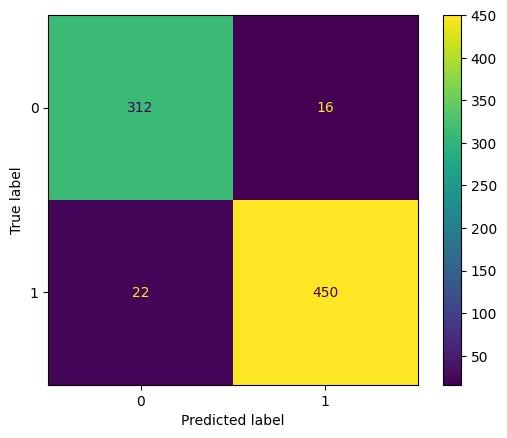

In [32]:
ConfusionMatrixDisplay.from_predictions(yTest , svcYPred)
plt.show()

In [33]:
logReg = make_pipeline(
    StandardScaler() , 
    LogisticRegression()
)
logReg.fit(xTrain , yTrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [34]:
logRegYPred = logReg.predict(xTest)
print(classification_report(yTest , logRegYPred , digits=4))

              precision    recall  f1-score   support

           0     0.9396    0.9482    0.9439       328
           1     0.9638    0.9576    0.9607       472

    accuracy                         0.9537       800
   macro avg     0.9517    0.9529    0.9523       800
weighted avg     0.9538    0.9537    0.9538       800



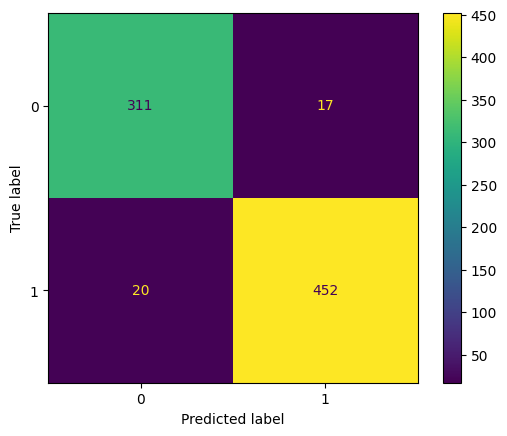

In [35]:
ConfusionMatrixDisplay.from_predictions(yTest , logRegYPred)
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.model_selection import RandomizedSearchCV as RSCV

In [38]:
dataScaler = StandardScaler()

xTrain_Scale = dataScaler.fit_transform(xTrain)
xTest_Scale = dataScaler.fit_transform(xTest)

In [40]:
logRegRSCVDist = {
    'C' : [0.001 , 0.01 , 0.1 , 1 , 10 , 100 , 1000] ,
    'solver' : ['newton-cg' , 'lbfgs' , 'liblinear' , 'saga']
}

logRegRSCV = LogisticRegression()

logRegRSCVSearch = RSCV(logRegRSCV , param_distributions=logRegRSCVDist , n_jobs=4 , random_state=0)
logRegRSCVSearch.fit(xTrain_Scale , yTrain)

logRegWinner = logRegRSCVSearch.best_estimator_
print(logRegWinner.score(xTest_Scale , yTest) , logRegRSCVSearch.best_params_)


0.94 {'solver': 'liblinear', 'C': 100}
